## Marketing Mix Modeling

Data set is borrowed from kaggle.com: https://www.kaggle.com/sazid28/advertising.csv

This is a very basic exploration of marketing mix modeling (MMM). MMM models often incorporate additional functionality, ie competitive activity, seasonality, impressions, reach, etc. The below is exploring the impact of spend on a company's sales.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\chad.gildersleeve\Downloads\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
#remove extra 'Unnamed' column
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_clean.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
#Data Description 

df_clean.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


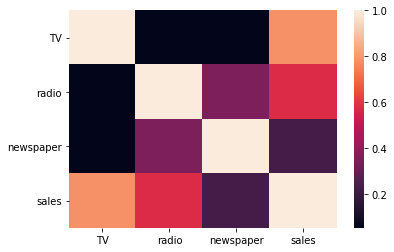

In [10]:
#Correlation b/w variables
corr = df_clean.corr()
sns.heatmap(corr)

In [11]:
#Labels and features
labels = df_clean['sales']
features = df_clean.drop(['sales'], axis=1)

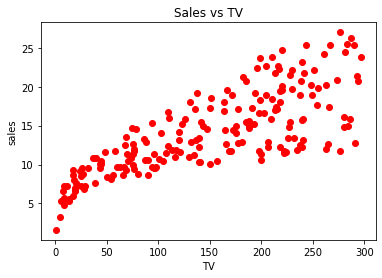

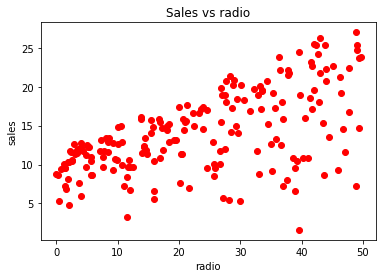

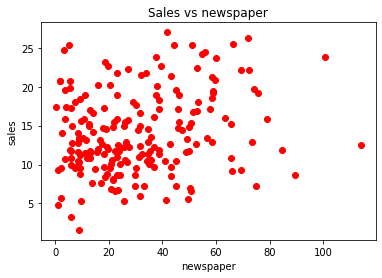

In [15]:
# Scatter graph b/w response and features
for x in features:
    plt.plot(features[x], labels, 'ro')  # arguments are passed to np.histogram
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

It looks like there is a strong relationship between sales and TV and sales and radio. At first glance TV looks to have more predictive power, having less deviation in its plot. Newspaper on the other hand doesn't seem to have any relationship with sales.

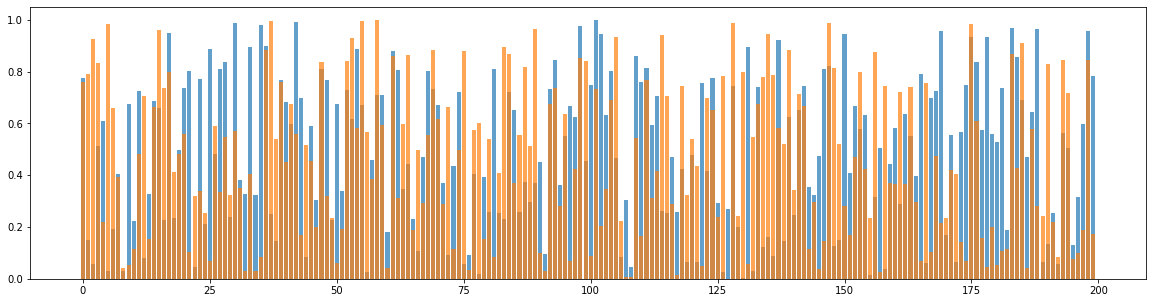

In [31]:
plt.figure(figsize=(20,5))
plt.bar(df.index, df.TV/df.TV.max(), alpha=.7 )
plt.bar(df.index, df.radio/df.radio.max(), alpha =.7)
plt.show()

There are significant differences in the air times of TV and radio. We can see the same thing from the correlation matrix. This could help to explain some of the variation in the bi-variate plots

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df)
sns.distplot((train_transaction['TransactionAmt'].apply(lambda x: np.log(x)))[(train_transaction.isFraud == 0)], bins=100)

plt.show()

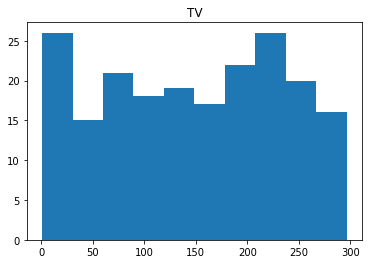

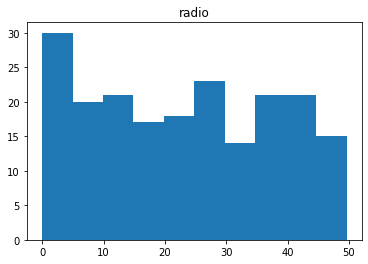

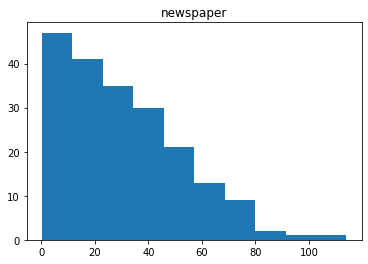

In [16]:
#Data Distribultion 
for x in features:
    plt.hist(features[x])  # arguments are passed to np.histogram
    plt.title(x)
    plt.show()

As from the above histogram graph, the data distribution for the newspaper is skrew towards left. Lets correct it using Box Cox which helps in removing the data skrewness.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


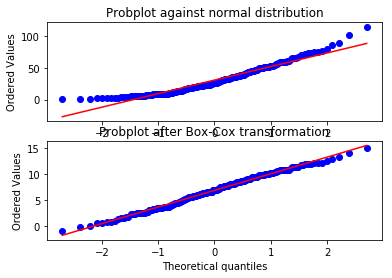

In [9]:
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df_clean['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)
df_clean['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df_clean['newspaper'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

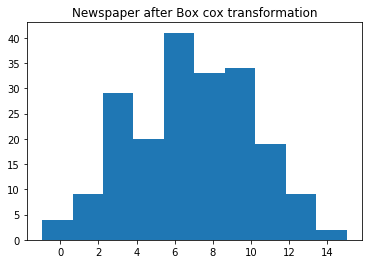

In [10]:
plt.hist(df_clean['newspaper'], bins='auto')  # arguments are passed to np.histogram
plt.title("Newspaper after Box cox transformation")
plt.show()

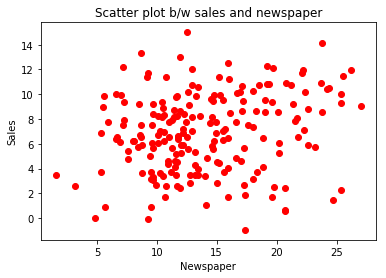

In [11]:
plt.plot(df_clean['sales'], df_clean['newspaper'], 'ro')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [12]:
# As from the above graph it is clear that newspaper do not have any relationship with the Sales.
# Lets build 2 algorithm with and without newspaper to get more clear picture.

In [32]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
model4 = sm.ols(formula="sales~radio", data=df_clean).fit()

#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        17:04:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

The data seems a little too good to be true, having a near 0.90 R-squared value. It could it's a new company and their sales are still heavily impacted by advertising. Nevertheless, taking a look at the results of the four models built, we can conclude:

    1. Newspaper has little to no impact on Sales.
        - It's coefficient is negligable and has a high p-value (0.86 is much greater than 0.05). As a result, when comparing AIC scores across models, model 2, which doesn't include the AIC score has a better score.
    2. Radio is much more efficient than TV
        - Radio has a much higher coefficient than TV. When looking at the plots radio has a similar scatter plot but a much smaller spend
    3. Although TV is less efficient, it could have a greater effectiveness than radio. One way to see would be model sales with impressions or GRP's and see if the results are similar. TV likely has a much higher CPM than radio, and it also likely has a different audience and reach, giving it its own value.

In [15]:
#Actual and predicted values
y_pred = model2.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(10)

,Actual,Predicted
0,22.1,20.555465
1,10.4,12.345362
2,9.3,12.337018
3,18.5,17.617116
4,12.9,13.223908
5,7.2,12.512084
6,11.8,11.718212
7,13.2,12.105516
8,4.8,3.709379
9,10.6,12.551697


After cutting newspaper from the media plan, we would likely re-allocate the spend. Some things that would be worth considering when re-allocating but require additional context:

    1. What kind of reach does each channel have and is there overlap between the two audiences?
    2. Would additional spend across TV or radio have a linear or logarithmic growth?
    3. How do external factors, such as competition and seasonality impact results
    